难点：
做三维图像
问题：
对于齐次边界条件,本征值只能选取特殊的分离值,这对于分离离散化后的方程来说意味着需要选择合适的参数使得矩阵的行列式为0
这样就需要先用sympy模块算出特定的参数,再构造Lamda矩阵,然后求解有无穷多组解的齐次线性方程组
这样与非齐次边界条件兼容可能较为困难
这或许可以通过取较小的边界条件实现
待做：
加上Umat在边界处的值

In [14]:
import numpy as np
# k=1
xN,Nx=1,9
yN,Ny=1,9
zN,Nz=1,8
xlist=np.linspace(0,xN,Nx)
deltax=xlist[1]-xlist[0]
k=np.sqrt(3)/deltax
def Boundary(y,z):
    f=lambda y,z:1
    g=lambda y,z:1
    return f(y,z),g(y,z)
#构造Lamda矩阵
Lambda=np.zeros((Nx-2,Nx-2))
alpha=(k*deltax)**2-2
for i in range(Nx-3):
    Lambda[i,i]=alpha
    Lambda[i+1,i],Lambda[i,i+1]=1,1
Lambda[Nx-3,Nx-3]=alpha
# np.linalg.matrix_rank(Lambda)
#构造u
ylist=np.linspace(0,yN,Ny)
zlist=np.linspace(0,zN,Nz)
Omega=np.zeros(Nx-2)
Umat=np.zeros((Nx-2,Ny,Nz))
for j in range(Ny):
    for k in range(Nz):
        Omega[0],Omega[Nx-3]=Boundary(ylist[j],zlist[k])
        Umat[:,j,k]=np.linalg.solve(Lambda,-Omega)


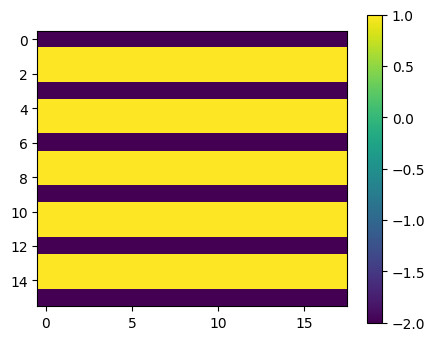

In [16]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5, 4))
# ax=fig.add_subplot(projection='3d')
plt.imshow(Umat[:,:,5])
plt.colorbar()
plt.show()